## AIDI 1002 ASSIGNMENT 1
## AUTHOR: AHMAD SAYEB

In [122]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing

#### Question1

In [158]:
def load_csv(path: str) -> 'dataframe':
    '''
    Loads csv into a dataframe
    
    Args:
        path: path to the csv file
    
    Returns:
        dataframe, loaded csv file
    '''
    df = pd.read_csv(path)
    print('description: \n', df.describe)
    print('data types: \n', df.dtypes)
    print('size of data: \n', df.shape)
    return pd.read_csv(path)


def imputer(df: 'dataframe', col: str):
    '''
    Imputes nan values with the mean of the column
    
    Args:
        df: dataframe
        col: targeted column
    
    '''
    print(f'imputing {col}...')
    col_mean = df[col].mean()
    df[col].fillna(col_mean, inplace=True)


def shapiro_normality_test(
    df: 'dataframe', 
    col: str, 
    alpha: float
) -> float:
    '''
    provides shapiro normality test
    
    Args:
        df: dataframe
        col: targeted column
    
    Returns:
        W: calculated shapiro test value
        p: p-value
    
    '''
    W, p = shapiro(df[col].values)
    if p > alpha:
        print('Failed to reject Null Hypothesis. Sample is Guassian')
    else:
        print('Rejected Null Hypothesis. Sample is not Guassian')
    
    return W,p


def dist_plot_test(df: 'dataframe'):
    '''
    Histogram of all the numerical columns
    
    Args:
        df: dataframe
        
    '''
    temp_df = df.select_dtypes('float')
    length = len(temp_df.columns.to_list())
    fig, axes = plt.subplots(1, length, figsize=(8, 4), sharey=True)
    fig.suptitle('Column Distributions')
    for i, col in enumerate(temp_df.columns):
        if df[col].dtypes == 'float64':
            print(col)
            sns.histplot(ax=axes[i], data=df[col])
            axes[i].set_title(col)

            
def qq_plot_test(df: 'dataframe'):
    '''
    Q-Q plot of all numerical columns
    
    Args:
        df: dataframe
        
    '''
    temp_df = df.select_dtypes('float')
    length = len(temp_df.columns.to_list())
    fig, axes = plt.subplots(1, length, figsize=(8, 4), sharey=True)
    fig.suptitle('Columns Q-Q Plot')
    for i, col in enumerate(temp_df.columns):
        if df[col].dtypes == 'float64':
            sm.qqplot(ax=axes[i], line='q',data=df[col])
            axes[i].set_title(col)
    
    
def cat_encoding(df: 'dataframe', col: str):
    '''
     Applies label encoding for the categorical column
     
     Args:
         df: dataframe
         col: target column
    '''
    print(f'lable encoding {col}...')
    label_encoder = preprocessing.LabelEncoder()
    df[col] = df[[col]].apply(label_encoder.fit_transform)
    
    
def normalize(df: 'dataframe', col: str):
    '''
    Normalizes the independent columns
    
    Args:
        df: dataframe
        col: target column
    '''
    
    print(f'normalizing {col}...')
    values = df[col].values
    min_max_scaler = preprocessing.MinMaxScaler()
    values_scaled = min_max_scaler.fit_transform(values.reshape(-1,1))
    df[col] = values_scaled


In [146]:
df = load_csv("noisy_data.csv")

description: 
 <bound method NDFrame.describe of    Region   Age   Income Online Shopper
0   India  49.0  86400.0             No
1  Brazil  32.0  57600.0            Yes
2     USA  35.0  64800.0             No
3  Brazil  43.0  73200.0             No
4     USA  45.0      NaN            Yes
5   India  40.0  69600.0            Yes
6  Brazil   NaN  62400.0             No
7   India  53.0  94800.0            Yes
8     USA  55.0  99600.0             No
9   India  42.0  80400.0            Yes>
data types: 
 Region             object
Age               float64
Income            float64
Online Shopper     object
dtype: object
size of data: 
 (10, 4)


In [147]:
df

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes
5,India,40.0,69600.0,Yes
6,Brazil,NaN,62400.0,No
7,India,53.0,94800.0,Yes
8,USA,55.0,99600.0,No
9,India,42.0,80400.0,Yes


Handling missing values. this function replaces missing values with Mean. This is peformed on columns that are numerical and contains Nan

In [149]:
# performing imputation for columns that contains Nan
# This functions
imputer(df, 'Age')
imputer(df, 'Income')
df

imputing Age...
imputing Income...


,Region,Age,Income,Online Shopper
0,India,49.000000,86400.000000,No
1,Brazil,32.000000,57600.000000,Yes
2,USA,35.000000,64800.000000,No
3,Brazil,43.000000,73200.000000,No
4,USA,45.000000,76533.333333,Yes
5,India,40.000000,69600.000000,Yes
6,Brazil,43.777778,62400.000000,No
7,India,53.000000,94800.000000,Yes
8,USA,55.000000,99600.000000,No
9,India,42.000000,80400.000000,Yes


Applying normality tests. For this I have used Shapiro Normality Test as its suitable for samples less than 50. The null hypothesis is that the distribution is Normal. In other words there is no difference between our distribution and a normal distribution. We use Shapiro score and p-value to decide that. If we have desired p-value but Shapiro score is below a cretain thresold, we may reject the hypothesis without refering to p-value. We also performed some visualizing tests like Q-Q plot and Distribution Plot. The sample is very small hence Distribution Plot is not that helpful. However from Q-Q plot we can see that most of the data are around mean hence we say "Failed to Reject Null Hypothesis"

In [155]:
print('Shapiro test for age')
print(shapiro_normality_test(df, 'Age', 0.05))
print('-----'*10)
print(shapiro_normality_test(df, 'Income', 0.05))

Shapiro test for age
Failed to reject Null Hypothesis. Sample is Guassian
(0.9711921811103821, 0.9016733765602112)
--------------------------------------------------
Failed to reject Null Hypothesis. Sample is Guassian
(0.9625768661499023, 0.8148096203804016)


Q-Q and distribution plots. These functions detect the numerical columns and plot them!

Age
Income


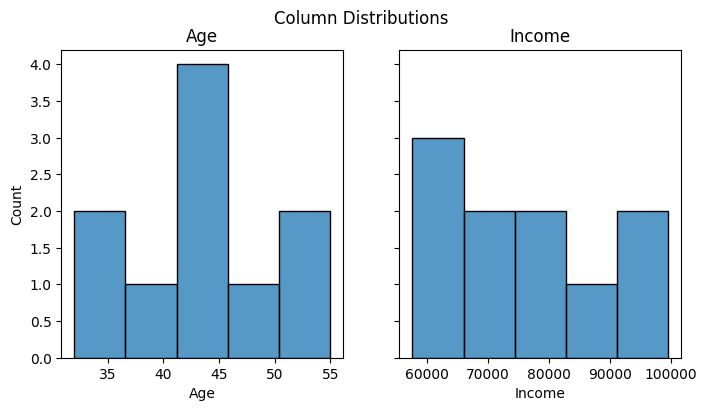

In [159]:
dist_plot_test(df)

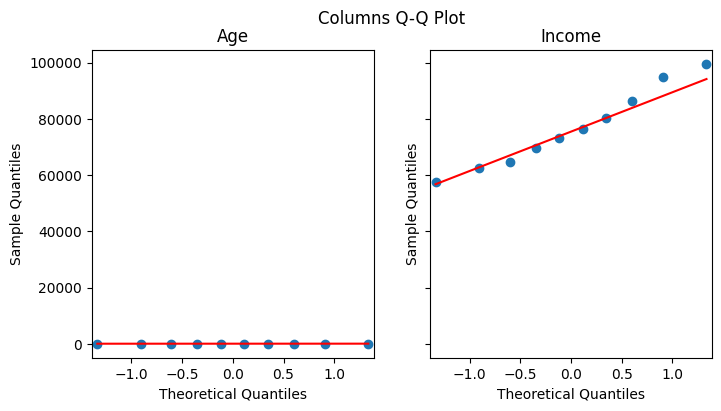

In [160]:
qq_plot_test(df)

Applying Label encoding to categorical columns and normalizing numerical data

In [163]:
cat_encoding(df, 'Region')
cat_encoding(df, 'Online Shopper')
normalize(df, 'Age')
normalize(df, 'Income')

lable encoding Region...
lable encoding Online Shopper...
normalizing Age...
normalizing Income...


In [164]:
df

,Region,Age,Income,Online Shopper
0,1,0.739130,0.685714,0
1,0,0.000000,0.000000,1
2,2,0.130435,0.171429,0
3,0,0.478261,0.371429,0
4,2,0.565217,0.450794,1
5,1,0.347826,0.285714,1
6,0,0.512077,0.114286,0
7,1,0.913043,0.885714,1
8,2,1.000000,1.000000,0
9,1,0.434783,0.542857,1
